In [1]:
#Import Dependencies
%matplotlib inline

#Start Python Imports
import math,time,random,datetime

#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
#import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize

#Machine Learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics,linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

#Let's be rebels and ignore warnigs for now
import warnings
warnings.filterwarnings('ignore')


In [2]:
#https://www.kaggle.com/hesh97/titanicdataset-traincsv
#url ='https://www.kaggle.com/c/titanic-dataset/dataload/titanic_test.csv'
#testdata = pd.read_csv("C:/Supriya/DataSet/titanic_test.csv")
# Import train & test data 
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
gender_submission = pd.read_csv('gender_baseline.csv') # example of what a submission should look like

In [3]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


In [5]:
gender_submission.head()

,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0


In [6]:
print(train.shape)
print(test.shape)
print(gender_submission.shape)

(850, 15)
(459, 14)
(459, 2)


In [7]:
train.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [8]:
#Lets's write a function to find out how many missing values are there

def find_missing_values(df,columns):
    """"
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns"""
    missing_vals={}
    print("Number of missing or NaN values for each column")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
    return missing_vals

missing_values = find_missing_values(train,columns=train.columns)
missing_values

Number of missing or NaN values for each column


{'passenger_id': 0,
 'pclass': 0,
 'name': 0,
 'sex': 0,
 'age': 174,
 'sibsp': 0,
 'parch': 0,
 'ticket': 0,
 'fare': 1,
 'cabin': 659,
 'embarked': 1,
 'boat': 542,
 'body': 777,
 'home.dest': 386,
 'survived': 0}

In [9]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [10]:
# Different data types in the dataset
train.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

In [11]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


0    537
1    313
Name: survived, dtype: int64


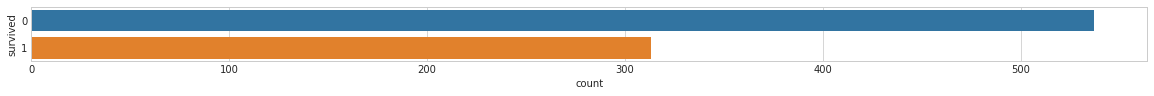

In [12]:
"""
Target Feature: Survived
Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others."""

# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='survived', data=train)
print(train.survived.value_counts())

In [13]:
# Let's add this to our subset dataframes
df_bin['survived'] = train['survived']
df_con['survived'] = train['survived']

In [14]:
df_con.head()

,survived
0,1
1,0
2,0
3,1
4,0


In [15]:
df_bin.head()

,survived
0,1
1,0
2,0
3,1
4,0


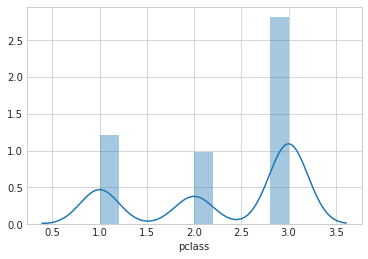

In [16]:
"""Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model."""

sns.distplot(train.pclass)

In [17]:
# How many missing variables does Pclass have?
missing_values['pclass']

0

In [18]:
df_bin['pclass'] = train['pclass']
df_con['pclass'] = train['pclass']

In [19]:
"""Feature: Name
Description: The name of the passenger"""
train.name.value_counts()

Kelly, Mr. James                                        2
Beesley, Mr. Lawrence                                   1
Pickard, Mr. Berk (Berk Trembisky)                      1
Abrahamsson, Mr. Abraham August Johannes                1
Walcroft, Miss. Nellie                                  1
Bowerman, Miss. Elsie Edith                             1
Ball, Mrs. (Ada E Hall)                                 1
Barkworth, Mr. Algernon Henry Wilson                    1
Collyer, Mrs. Harvey (Charlotte Annie Tate)             1
Gilinski, Mr. Eliezer                                   1
Hart, Miss. Eva Miriam                                  1
Rosblom, Miss. Salli Helena                             1
Smiljanic, Mr. Mile                                     1
Butt, Major. Archibald Willingham                       1
LeRoy, Miss. Bertha                                     1
Vander Planke, Miss. Augusta Maria                      1
Gill, Mr. John William                                  1
Jenkin, Mr. St

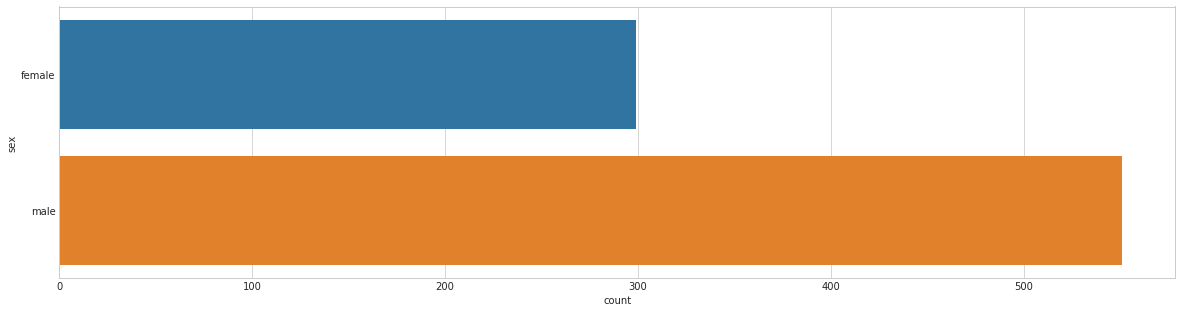

In [20]:
"""Note: Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.
Feature: Sex
Description: The sex of the passenger (male or female)."""

plt.figure(figsize=(20,5))
sns.countplot(y="sex",data=train)

In [21]:
# Are there any missing values in the Sex column?
missing_values['sex']

0

In [22]:
#Since this is already binary variable (male or female), let's add it straight to our subset dataframes
# add Sex to the subset dataframes
df_bin['sex'] = train['sex']
df_bin['sex'] = np.where(df_bin['sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['sex'] = train['sex']


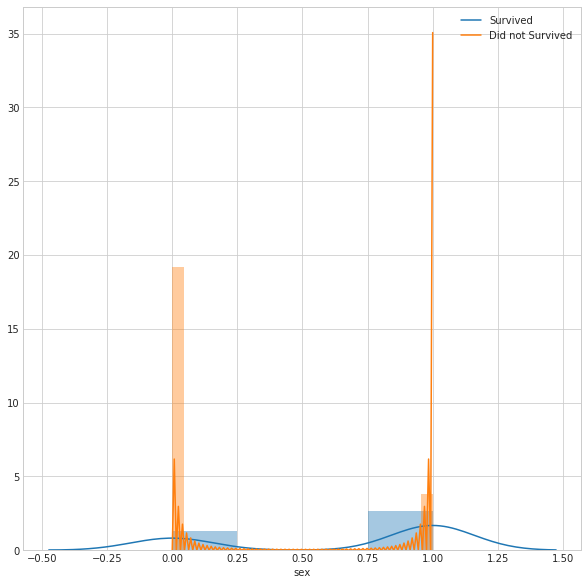

In [23]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['survived'] == 1]['sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['survived'] == 0]['sex'], kde_kws={'label': 'Did not Survived'});

                               

In [24]:
"""Not many people survived. But of those who did, more were female.

Feature: Age
Description: The age of the passenge"""

# How many missing values does age have?
missing_values['age']

174

In [25]:
"""What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date."""
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed
#Challenge: How would you fill the missing variables in the Age column?

"What would you do with these missing values?\n\nCould replace them with the average age? What's the pro's and con's of doing this?\n\nOr would you get rid of them completely?\n\nWe won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date."

In [26]:
#Function to create count and distribution visualisations
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});


In [27]:
#Feature: SibSp
#Description: The number of siblings/spouses the passenger has aboard the Titanic.
# How many missing values does SibSp have?
missing_values['sibsp']

0

In [28]:
train.sibsp.value_counts()

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: sibsp, dtype: int64

In [29]:
#Let's add SibSp to our subset dataframes and view the distributions.
# Add SibSp to subset dataframes
df_bin['sibsp'] = train['sibsp']
df_con['sibsp'] = train['sibsp']

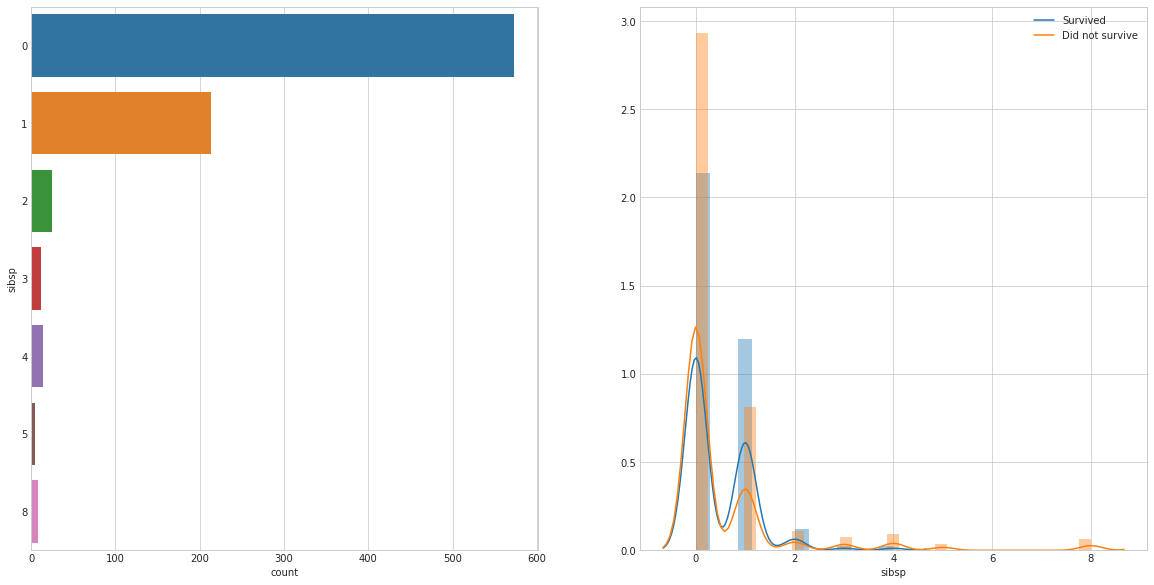

In [30]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='survived', 
                target_column='sibsp', 
                figsize=(20, 10))

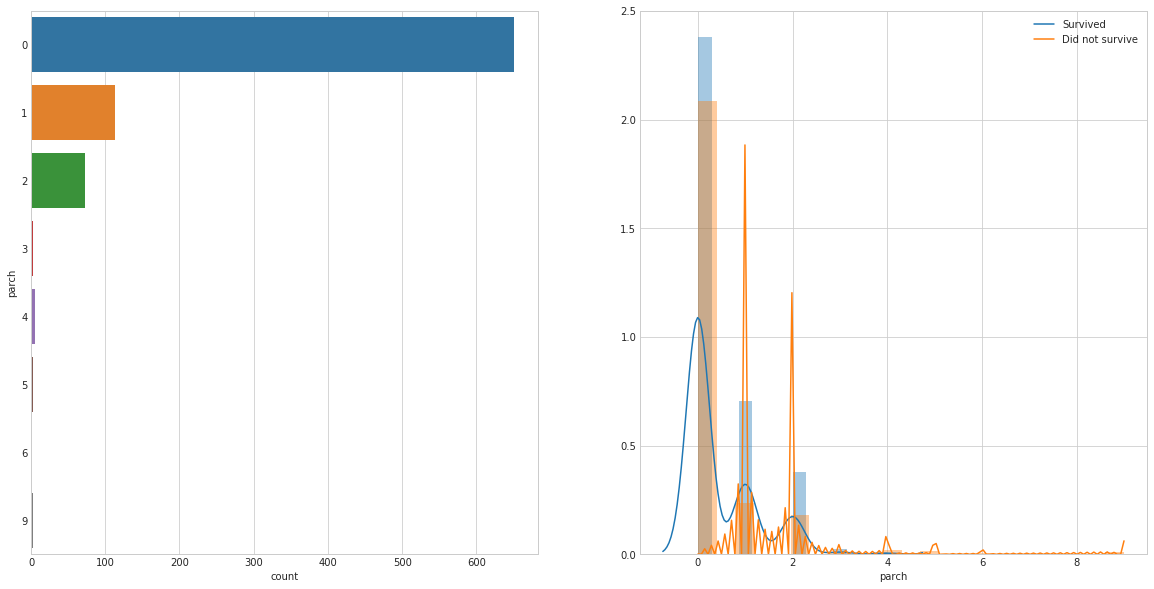

In [31]:
#Feature: Parch
#Description: The number of parents/children the passenger has aboard the Titanic.
#Since this feature is similar to SibSp, we'll do a similar analysis.
missing_values['parch']
train.parch.value_counts()
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='survived', 
                target_column='parch', 
                figsize=(20, 10))

In [32]:
train.head()


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [33]:
df_bin['parch'] = train['parch']
df_con['parch'] = train['parch']
df_con.head()

,survived,pclass,sex,sibsp,parch
0,1,3,female,0,0
1,0,3,male,0,0
2,0,3,female,1,1
3,1,2,female,1,3
4,0,2,male,0,0


In [34]:
#Feature: Ticket
#Description: The ticket number of the boarding passenger.
missing_values['ticket']

0

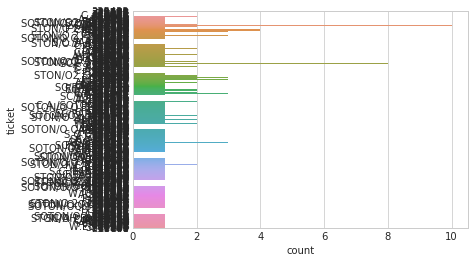

In [35]:
sns.countplot(y='ticket',data=train)

In [36]:
# How many kinds of ticket are there?
train.ticket.value_counts()

CA. 2343            10
1601                 8
CA 2144              6
S.O.C. 14879         6
PC 17608             6
347082               6
113503               5
113781               5
382652               5
3101295              4
347088               4
113760               4
PC 17757             4
349909               4
12749                4
4133                 4
W./C. 6607           3
PC 17760             3
PC 17755             3
220845               3
C.A. 2315            3
C.A. 34651           3
36928                3
363291               3
C.A. 2673            3
SC/Paris 2123        3
19950                3
PC 17761             3
LINE                 3
33638                3
                    ..
STON/O2. 3101290     1
347075               1
13214                1
347066               1
349227               1
113796               1
349248               1
364516               1
112378               1
SOTON/OQ 392076      1
315096               1
7267                 1
110465     

In [37]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.ticket.unique())))

There are 660 unique Ticket values.


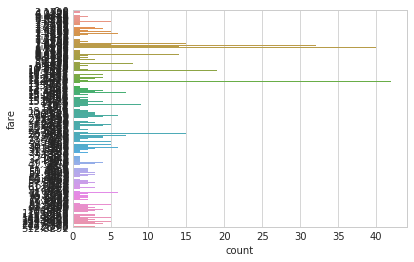

In [38]:
"""There are 681 unique Ticket values.
681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

There may be some way to reduce this down.

Challenge: How could you reduce the Ticket feature? Is it even possible?

Hint: It may be similar to what you could do with Name.

Feature: Fare
Description: How much the ticket cost."""

missing_values['fare']
sns.countplot(y="fare",data=train);

In [39]:
# What kind of variable is Fare?
train.fare.dtype


dtype('float64')

In [40]:

# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.fare.unique())))

There are 237 unique Fare values.


In [41]:
"""Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

# Add Fare to sub dataframes"""
df_con['fare'] = train['fare'] 
df_bin['fare'] = pd.cut(train['fare'], bins=5) # discretised

In [42]:
# What do our Fare bins look like?
df_bin.fare.value_counts()


(-0.512, 102.466]     792
(102.466, 204.932]     30
(204.932, 307.398]     24
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: fare, dtype: int64

ValueError: cannot convert float NaN to integer

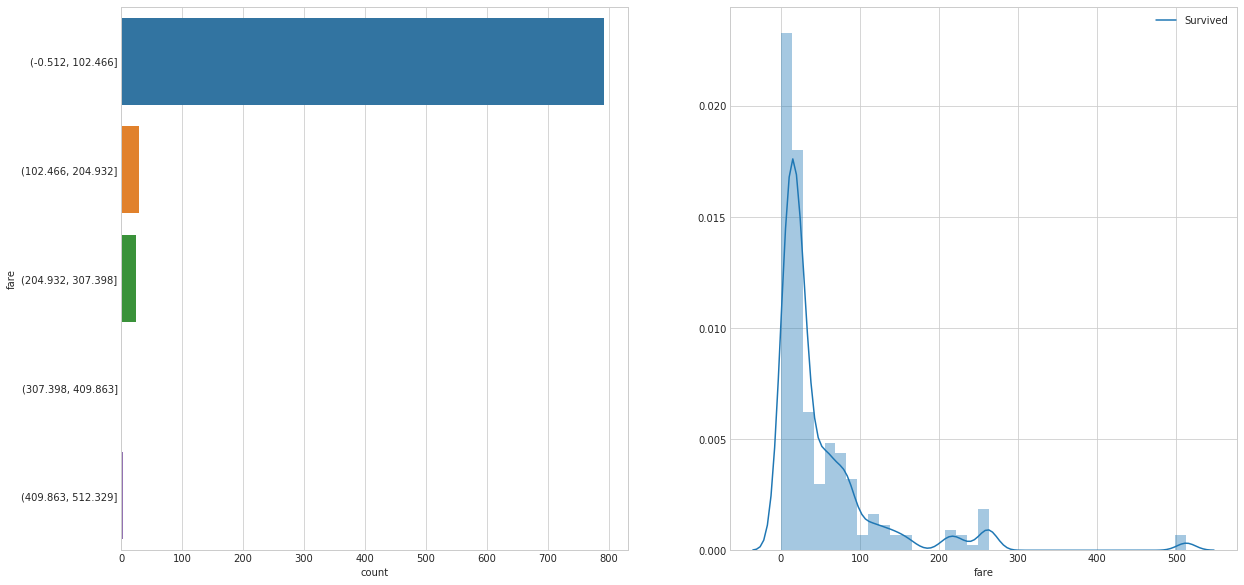

In [43]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='survived', 
                target_column='fare', 
                figsize=(20,10), 
                use_bin_df=True)

In [ ]:
#Feature: Cabin
#Description: The cabin number where the passenger was staying.

# How many missing values does Cabin have?
missing_values['cabin']

In [ ]:
 #What do the Cabin values look like?
train.cabin.value_counts()
train.head()

In [ ]:
#Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.


In [ ]:
#Feature: Embarked
#Description: The port where the passenger boarded the Titanic.
#Key: C = Cherbourg, Q = Queenstown, S = Southampton
# How many missing values does Embarked have?
missing_values['embarked']

In [ ]:
# What kind of values are in Embarked?
train.embarked.value_counts()

In [ ]:
#Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.
# What do the counts look like?
sns.countplot(y='embarked', data=train);

In [ ]:
# Add Embarked to sub dataframes
df_bin['embarked'] = train['embarked']
df_con['embarked'] = train['embarked']

In [ ]:

# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['embarked'])
df_bin = df_bin.dropna(subset=['embarked'])
print(len(df_con))

In [ ]:
"""Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn."""

df_bin.head()

In [ ]:
df_con.head()

In [45]:

# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()
#df_bin.columns.tolist()

,survived,pclass_1,pclass_2,pclass_3,sex_0,sex_1,sibsp_0,sibsp_1,sibsp_2,sibsp_3,...,parch_3,parch_4,parch_5,parch_6,parch_9,"fare_(-0.512, 102.466]","fare_(102.466, 204.932]","fare_(204.932, 307.398]","fare_(307.398, 409.863]","fare_(409.863, 512.329]"
0,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df_con.head(10)

,survived,pclass,sex,sibsp,parch,fare
0,1,3,female,0,0,7.7333
1,0,3,male,0,0,8.6625
2,0,3,female,1,1,24.1500
3,1,2,female,1,3,23.0000
4,0,2,male,0,0,13.0000
5,0,3,male,0,0,22.5250
6,0,3,male,0,0,0.0000
7,1,2,female,0,0,13.0000
8,1,3,female,0,0,7.7750
9,0,3,female,1,0,9.8250


In [47]:
# Label Encode all continuous values using LabelEncoder()
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head(20)

,survived,pclass,sex,sibsp,parch,fare
0,1,2,0,0,0,25
1,0,2,1,0,0,48
2,0,2,0,1,1,124
3,1,1,0,1,3,120
4,0,1,1,0,0,77
5,0,2,1,0,0,119
6,0,2,1,0,0,0
7,1,1,0,0,0,77
8,1,2,0,0,0,29
9,0,2,0,1,0,60


In [48]:
"""Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

Let's seperate the data"""

# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc


In [49]:
selected_df.head(2)

,survived,pclass,sex,sibsp,parch,fare
0,1,2,0,0,0,25
1,0,2,1,0,0,48


In [54]:
# Split the dataframe into data and labels
X_train = selected_df.drop('survived', axis=1) # data
y_train = selected_df.survived # labels
print(X_train.shape)
print(y_train.shape)

(850, 5)
(850,)
